# **Importing libraries and Loading dataset**

---



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("banking_data.csv")
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


# **Data Preprocessing**

---



In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,3
marital_status,3
education,3
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
df.drop("marital", axis=1, inplace=True)

In [ ]:
df.dropna(subset=["marital_status","education"],axis=0,inplace=True)
df.isnull().sum()

,0
age,0
job,0
marital_status,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.drop("day_month",axis=1,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.replace('unknown', np.nan, inplace=True)
print(df.isna().sum())

age                   0
job                 288
marital_status        0
education          1857
default               0
balance               0
housing               0
loan                  0
contact           13020
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          36957
y                     0
dtype: int64


In [ ]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna('missing', inplace=True)  # to retain information about missingness

In [ ]:
df['poutcome'].fillna('unknown', inplace=True)
df['had_previous_campaign'] = df['poutcome'].apply(lambda x: 1 if x == 'success' else 0)
df.drop('poutcome',axis=1,inplace=True)

In [ ]:
df['contact'].fillna('unknown', inplace=True)

In [ ]:
df

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,had_previous_campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,0
3,47,blue-collar,married,missing,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,0
4,33,blue-collar,single,missing,no,1,no,no,unknown,5,may,198,1,-1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes,0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes,1


In [ ]:
# Interchange the last two column positions
# Get the list of columns
cols = df.columns.tolist()
# Get the names of the last two columns
last_col = cols[-1]
second_to_last_col = cols[-2]
# Swap the positions of the last two columns in the list
cols[-1] = second_to_last_col
cols[-2] = last_col

# Reindex the DataFrame with the new column order
df = df[cols]

df

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,had_previous_campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,no
3,47,blue-collar,married,missing,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,no
4,33,blue-collar,single,missing,no,1,no,no,unknown,5,may,198,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1,yes


In [ ]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,had_previous_campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,0,0
3,47,blue-collar,married,missing,0,1506,1,0,unknown,5,may,92,1,-1,0,0,0
4,33,blue-collar,single,missing,0,1,0,0,unknown,5,may,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,0,505,0,1,cellular,17,nov,386,2,-1,0,0,1
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,0,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,1,1


# **Exploratory Data Analsis**

---



**1. What is the distribution of age among the clients?**

---



In [ ]:
print(df['age'].describe())

count    45205.000000
mean        40.936489
std         10.616824
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


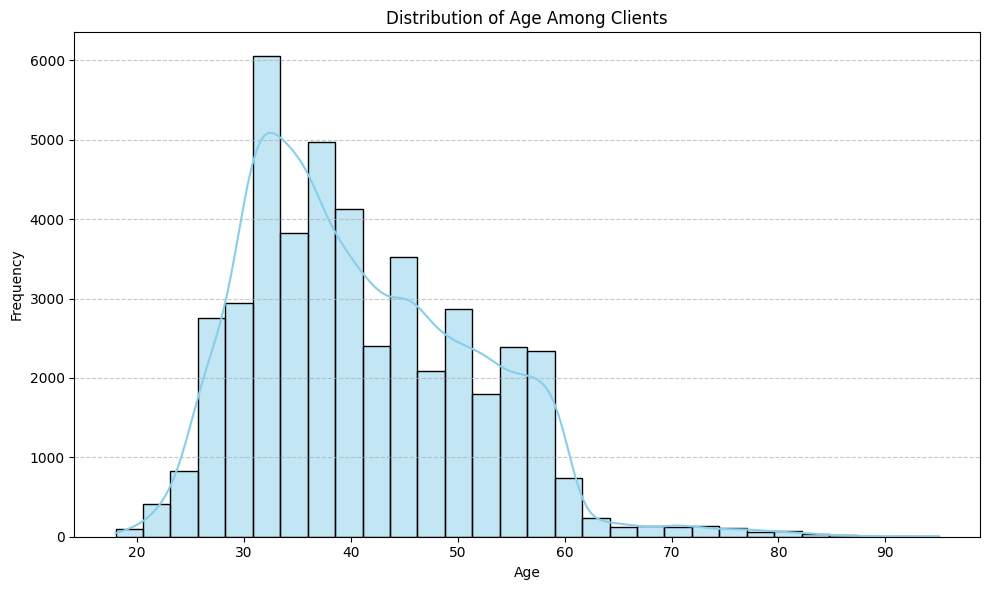

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Among Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

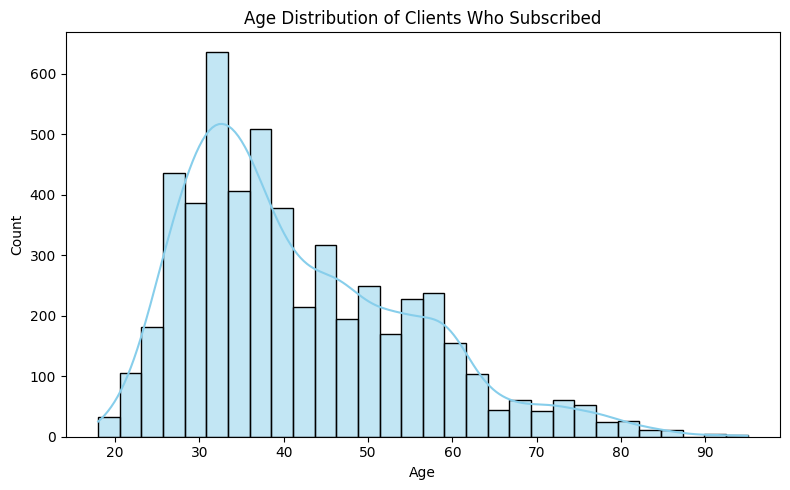

In [ ]:
subscribed_df = df[df['y'] == 1]

# Plot the age distribution for subscribed clients
plt.figure(figsize=(8, 5))
sns.histplot(data=subscribed_df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Clients Who Subscribed')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**2. How does the job type vary among the clients?**

---



In [ ]:
job_counts = df['job'].value_counts()
print(job_counts)

job
blue-collar      10019
management        9456
technician        7597
admin.            5171
services          4154
retired           2263
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            936
Name: count, dtype: int64


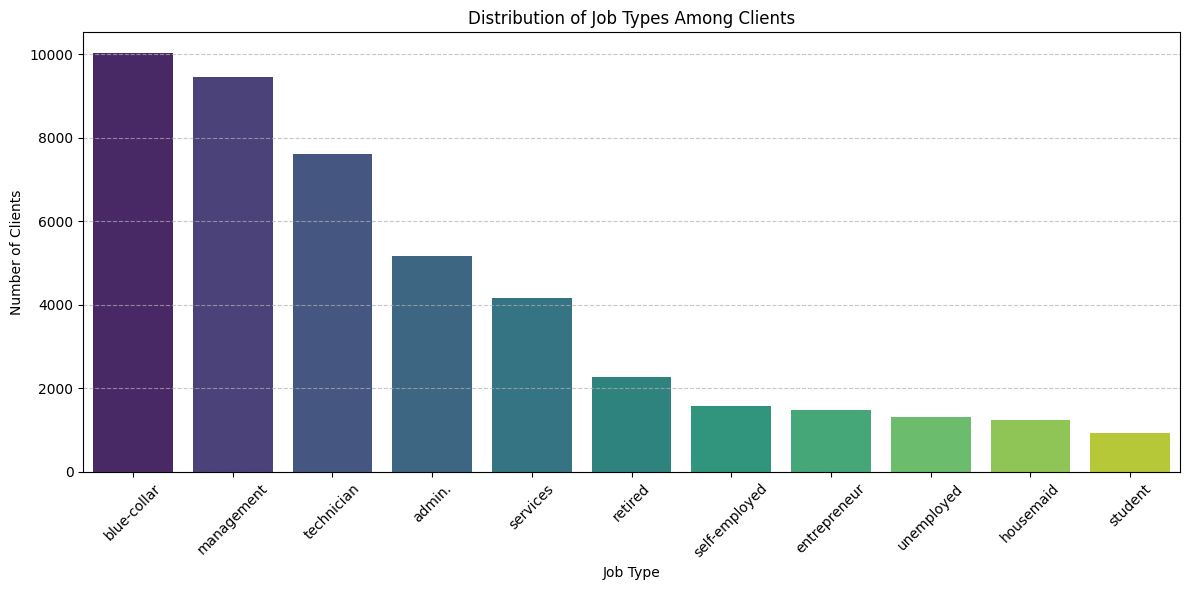

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

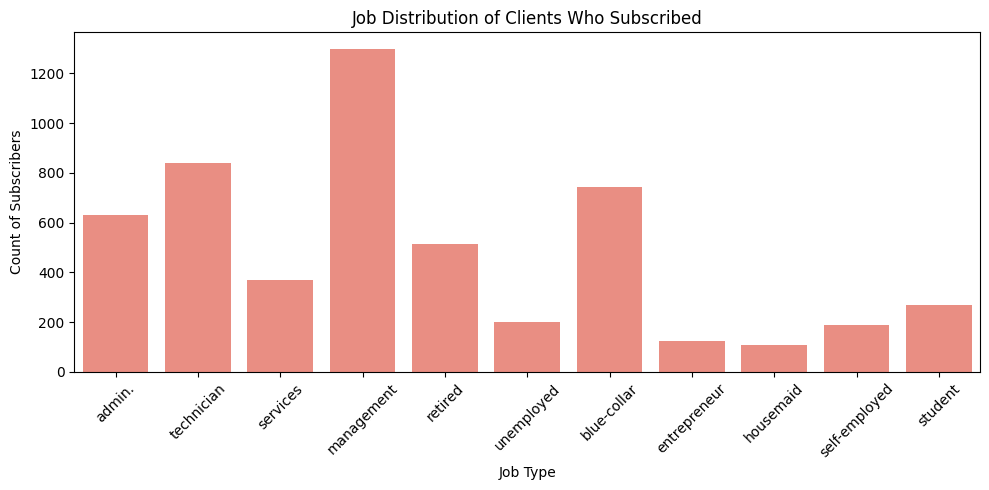

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=subscribed_df, x='job', color='salmon')
plt.title('Job Distribution of Clients Who Subscribed')
plt.xlabel('Job Type')
plt.ylabel('Count of Subscribers')
plt.xticks(rotation=45)  # Rotate job labels vertically
plt.tight_layout()
plt.show()

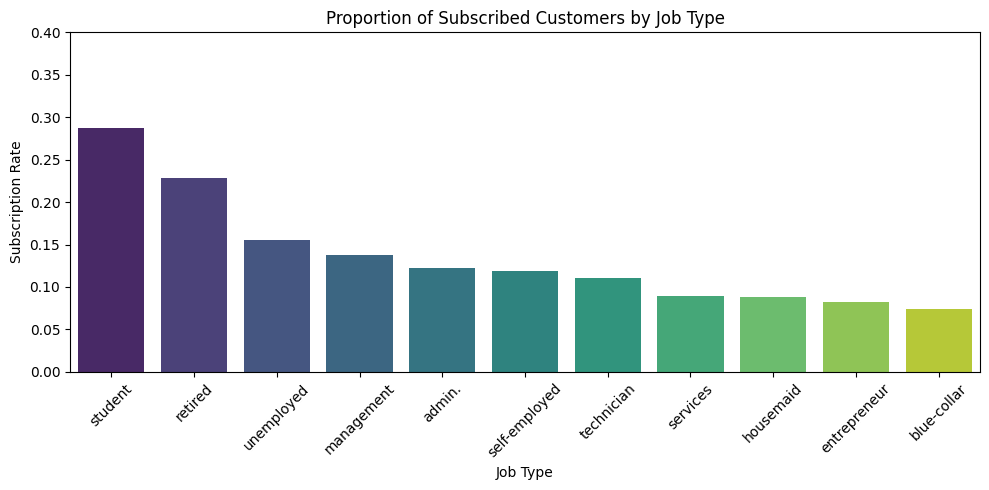

In [ ]:
subscription_rate = df.groupby('job')['y'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=subscription_rate, x='job', y='y', palette='viridis')

plt.title('Proportion of Subscribed Customers by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.ylim(0,0.4)  # since it's a proportion
plt.tight_layout()
plt.show()

**3. What is the marital status distribution of the clients?**

---



In [ ]:
marital_status_counts = df['marital_status'].value_counts()
print(marital_status_counts)

marital_status
married     27213
single      12786
divorced     5206
Name: count, dtype: int64


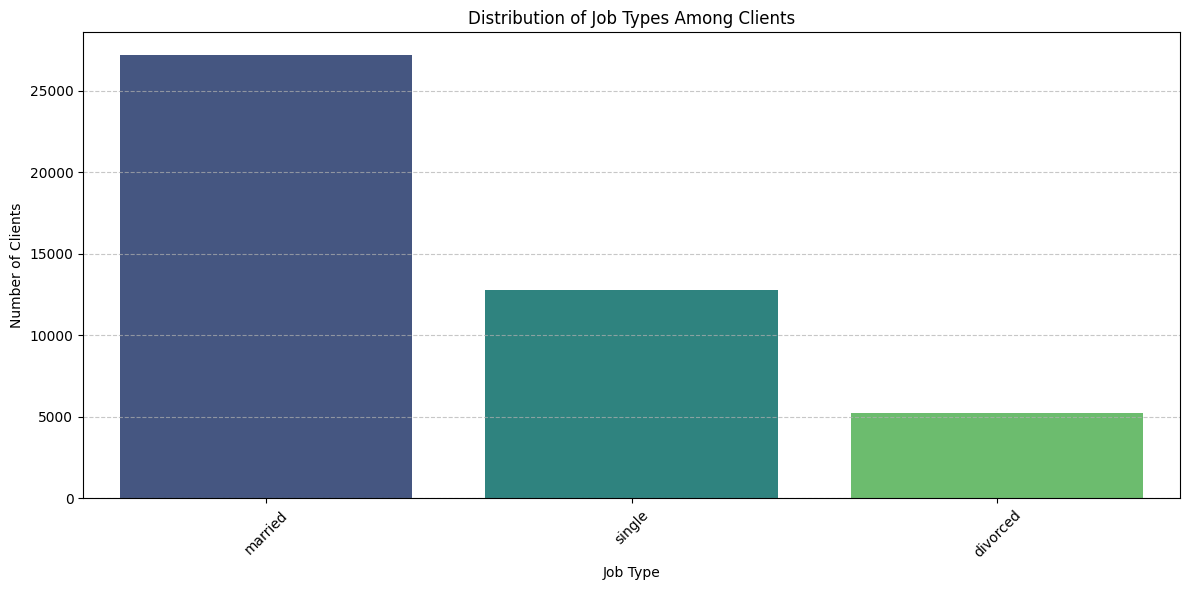

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='viridis')
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 **4. What is the level of education among the clients?**

---



In [ ]:
edu_counts = df['education'].value_counts()
print(edu_counts)

education
secondary    23199
tertiary     13299
primary       6850
missing       1857
Name: count, dtype: int64


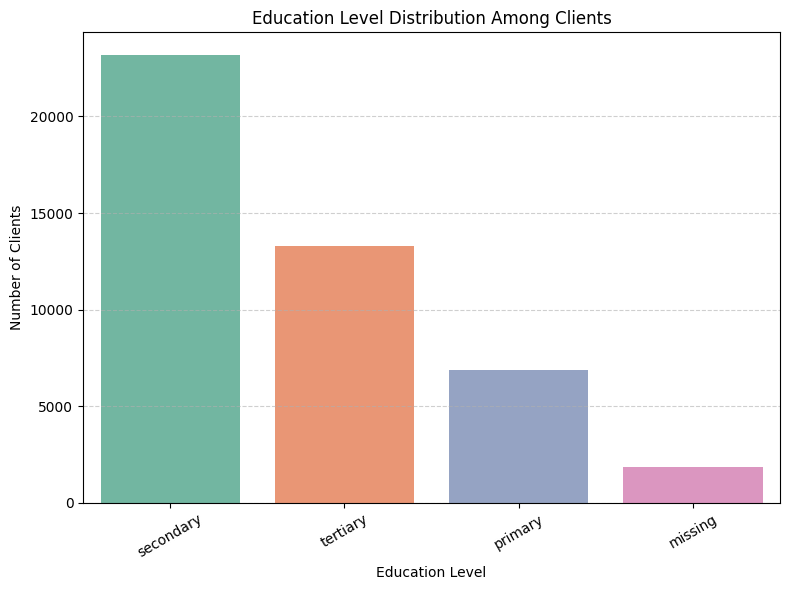

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette='Set2')
plt.title('Education Level Distribution Among Clients')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Subscription Rate')

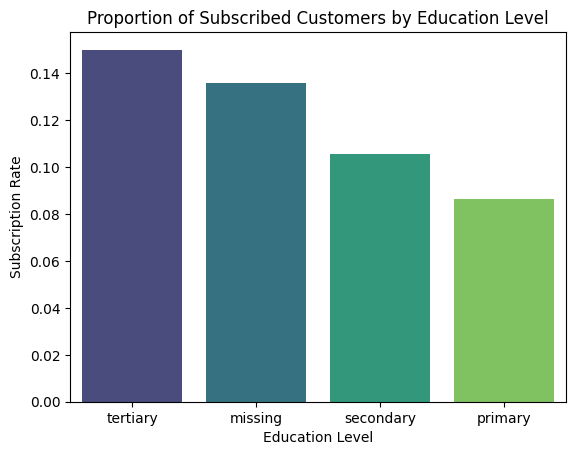

In [ ]:
subscribed_edu = df.groupby('education')['y'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=subscribed_edu, x='education', y='y', palette='viridis')

plt.title('Proportion of Subscribed Customers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')

**5. What proportion of clients have credit in default?**

---



In [ ]:
default_counts = df['default'].value_counts()
print(default_counts)

default
0    44390
1      815
Name: count, dtype: int64


In [ ]:
default_percent = round((default_counts / default_counts.sum()) * 100, 2)
print(default_percent)

default
0    98.2
1     1.8
Name: count, dtype: float64


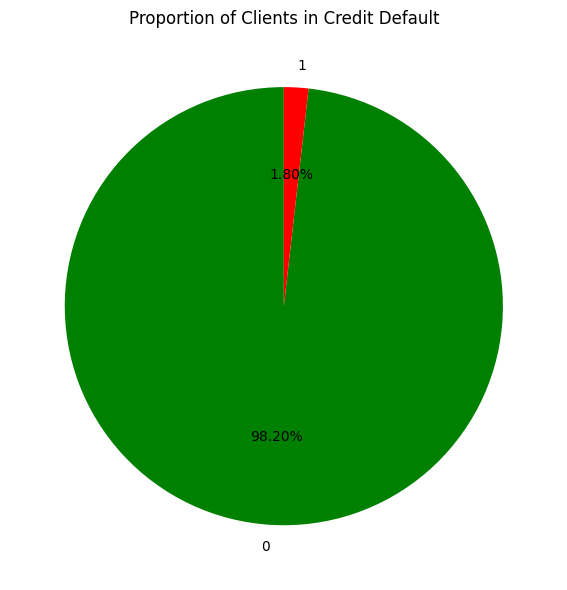

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.2f%%', colors=['green', 'red'], startangle=90)
plt.title('Proportion of Clients in Credit Default')
plt.tight_layout()
plt.show()

**6. What is the distribution of average yearly balance among the clients?**

---



In [ ]:
print(df['balance'].describe())

count     45205.000000
mean       1362.327243
std        3044.937834
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


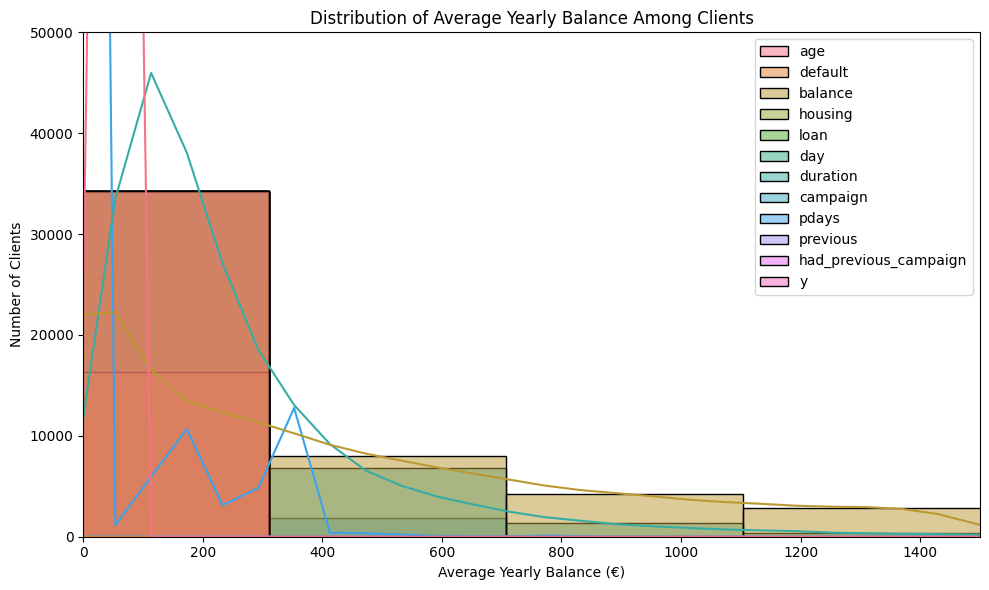

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['balance']<=1500], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.title('Distribution of Average Yearly Balance Among Clients')
plt.xlabel('Average Yearly Balance (€)')
plt.ylabel('Number of Clients')
plt.xlim(0,1500)
plt.ylim(0,50000)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

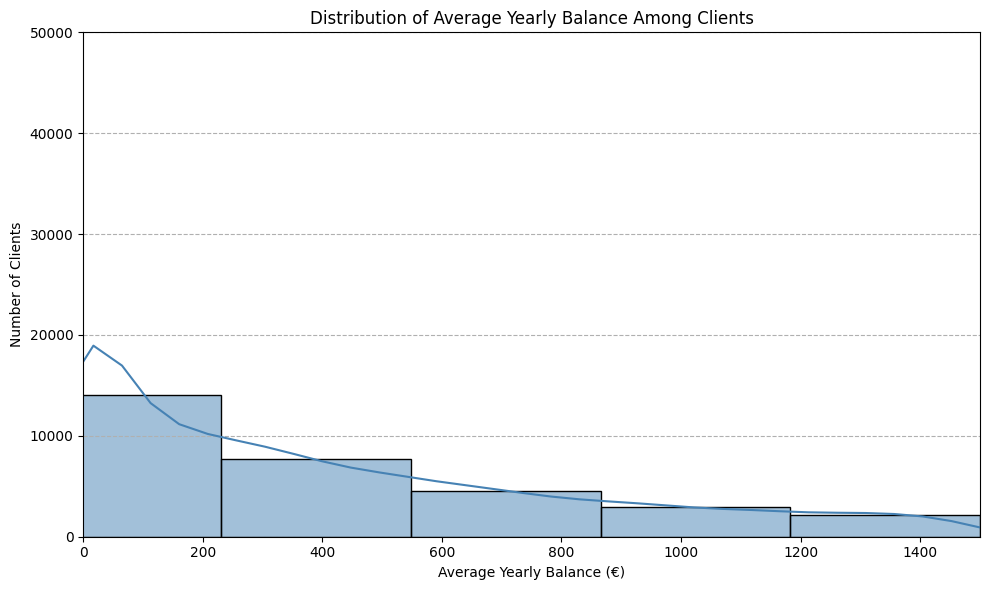

In [ ]:
plt.clf()
plt.figure(figsize=(10, 6))

# Plot balance distribution under 1500
sns.histplot(
    data=df[df['balance'] <= 1500],
    x='balance',
    bins=30,
    kde=True,
    color='steelblue',
    edgecolor='black'
)

# Titles and labels
plt.title('Distribution of Average Yearly Balance Among Clients')
plt.xlabel('Average Yearly Balance (€)')
plt.ylabel('Number of Clients')
plt.xlim(0, 1500)
plt.ylim(0, 50000)

# Remove legend (optional)
plt.legend([], [], frameon=False)

plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

**8. How many clients have housing loans?**

---



In [ ]:
housing_loan = df['housing'].value_counts()
print(housing_loan)

housing
1    25130
0    20075
Name: count, dtype: int64


In [ ]:
num_with_loans = housing_loan[1]
total_clients = housing_loan.sum()
proportion_with_loans = round((num_with_loans / total_clients) * 100, 2)

print(f"Clients with housing loans: {num_with_loans}")
print(f"Proportion: {proportion_with_loans}%")


Clients with housing loans: 25130
Proportion: 55.59%


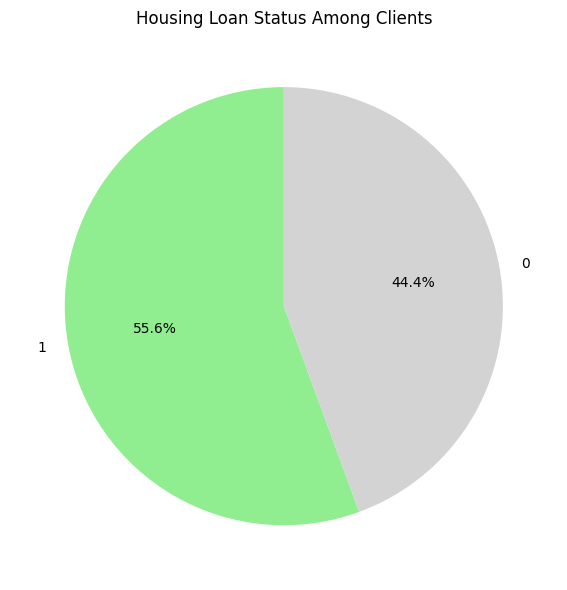

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(housing_loan, labels=housing_loan.index, autopct='%1.1f%%', colors=['lightgreen', 'lightgray'], startangle=90)
plt.title('Housing Loan Status Among Clients')
plt.tight_layout()
plt.show()

**9. How many clients have personal loans?**

---






In [ ]:
personal_loan = df['loan'].value_counts()
print(personal_loan)

loan
0    37961
1     7244
Name: count, dtype: int64


In [ ]:
num_with_personal_loans = personal_loan[1]
total_clients = personal_loan.sum()
proportion_with_loans = round((num_with_personal_loans / total_clients) * 100, 2)

print(f"Clients with personal loans: {num_with_personal_loans}")
print(f"Proportion: {proportion_with_loans}%")


Clients with personal loans: 7244
Proportion: 16.02%


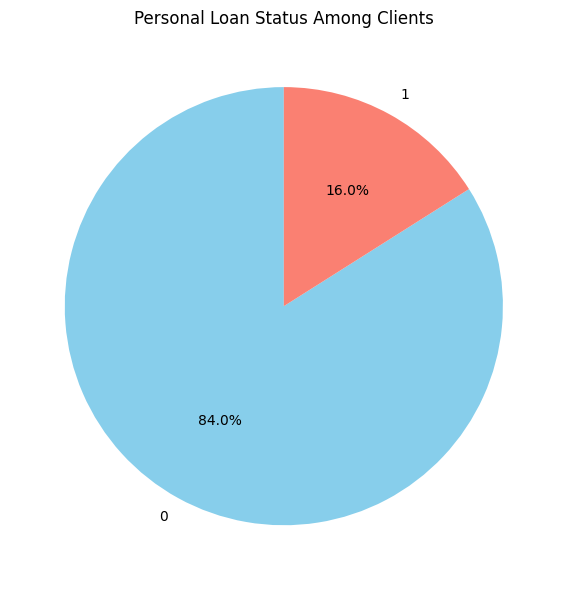

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(personal_loan, labels=personal_loan.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Personal Loan Status Among Clients')
plt.tight_layout()
plt.show()

**10. What are the communication types used for contacting clients during the campaign?**

---



In [ ]:
contact_counts = df['contact'].value_counts()
print(contact_counts)

contact
cellular     29283
unknown      13020
telephone     2902
Name: count, dtype: int64


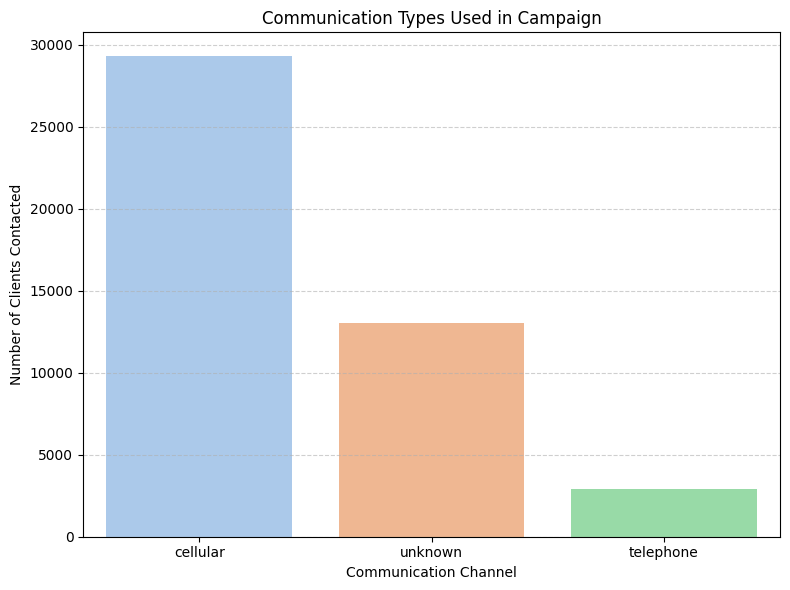

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='pastel')
plt.title('Communication Types Used in Campaign')
plt.xlabel('Communication Channel')
plt.ylabel('Number of Clients Contacted')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**11. What is the distribution of the last contact day of the month?**

---



In [ ]:
day_counts = df['day'].value_counts().sort_index()
print(day_counts)

day
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1840
9     1561
10     523
11    1479
12    1602
13    1585
14    1848
15    1703
16    1415
17    1938
18    2308
19    1757
20    2752
21    2025
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: count, dtype: int64


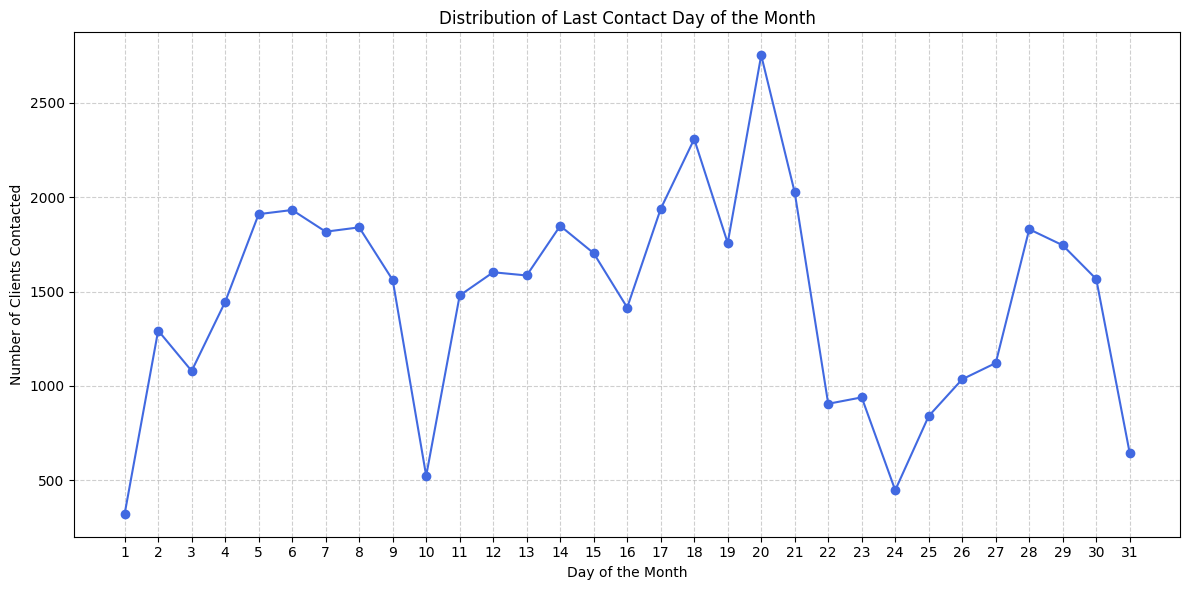

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', color='royalblue', linestyle='-')
plt.title('Distribution of Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Clients Contacted')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

**12. How does the last contact month vary among the clients?**

---



In [ ]:
month_counts = df['month'].value_counts().sort_index()
print(month_counts)

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3967
oct      735
sep      579
Name: count, dtype: int64


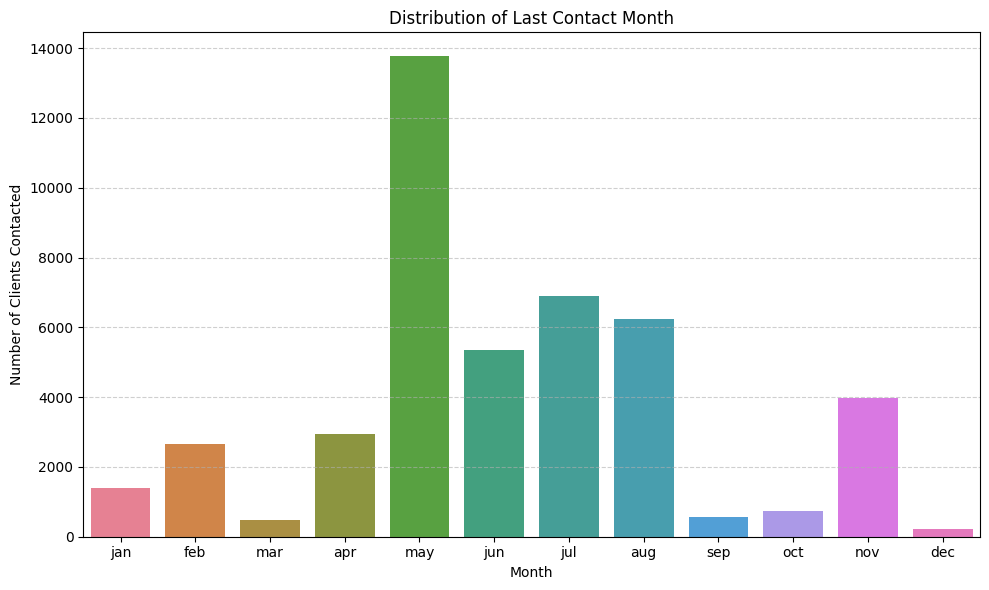

In [ ]:
df['month'] = df['month'].str.lower().str.strip()  # Clean

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

month_counts = df['month'].value_counts().reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='husl')
plt.title('Distribution of Last Contact Month')
plt.xlabel('Month')
plt.ylabel('Number of Clients Contacted')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**13. What is the distribution of the duration of the last contact?**

---



In [ ]:
print(df['duration'].describe())

count    45205.000000
mean       258.152218
std        257.534665
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


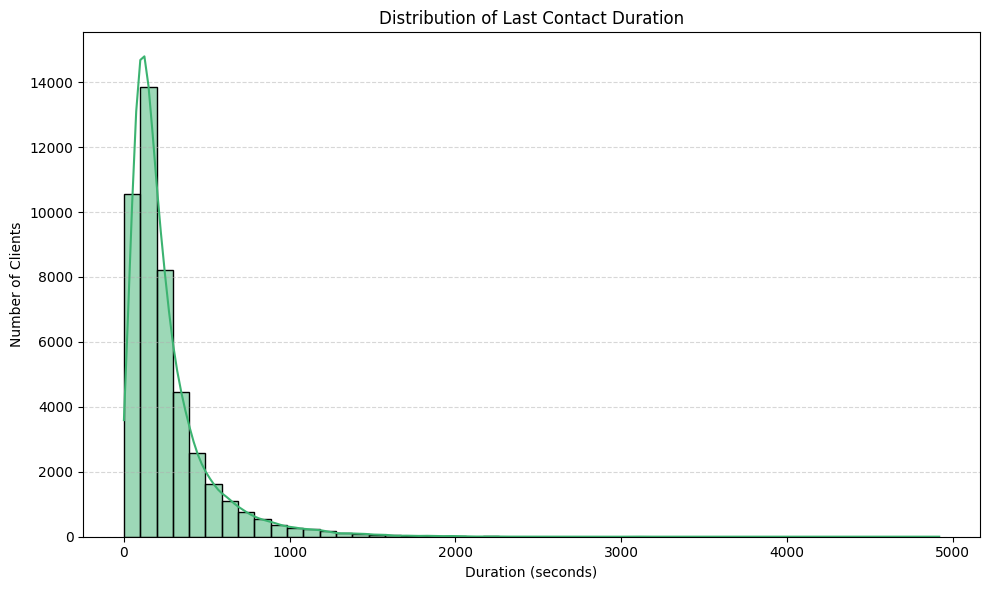

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True, color='mediumseagreen')
plt.title('Distribution of Last Contact Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**14. How many contacts were performed during the campaign for each client?**

---



In [ ]:
contact_counts = df['campaign'].value_counts().sort_index()
print(contact_counts)

campaign
1     17541
2     12503
3      5521
4      3521
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: count, dtype: int64


In [ ]:
print(df['campaign'].describe())

count    45205.000000
mean         2.763964
std          3.098184
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


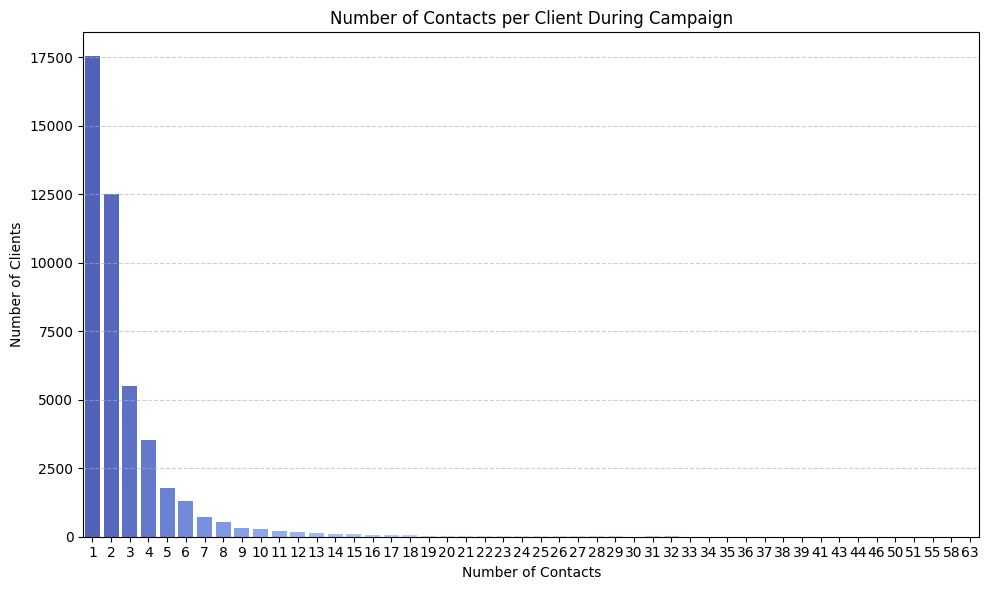

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=contact_counts.index, y=contact_counts.values, palette='coolwarm')
plt.title('Number of Contacts per Client During Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**15. What is the distribution of the number of days passed since the client was last contacted from a previous campaign?**

---



In [ ]:
print(df['pdays'].describe())

count    45205.000000
mean        40.183276
std        100.113286
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [ ]:
print(df['pdays'].value_counts().sort_index())

pdays
-1      36952
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: count, Length: 559, dtype: int64


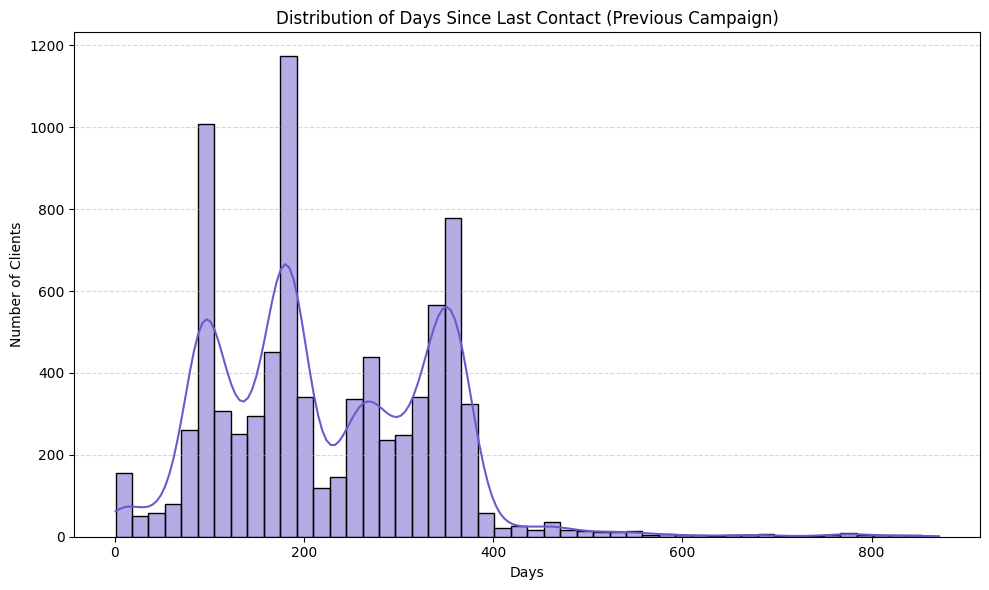

In [ ]:
pdays_filtered = df[df['pdays'] != -1]

plt.figure(figsize=(10, 6))
sns.histplot(pdays_filtered['pdays'], bins=50, kde=True, color='slateblue')
plt.title('Distribution of Days Since Last Contact (Previous Campaign)')
plt.xlabel('Days')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**16. How many contacts were performed before the current campaign for each client?**

---



In [ ]:
print(df['previous'].describe())

count    45205.000000
mean         0.580179
std          2.303505
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


In [ ]:
contact_history = df['previous'].value_counts().sort_index()
print(contact_history)

previous
0      36952
1       2772
2       2103
3       1142
4        713
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: count, dtype: int64


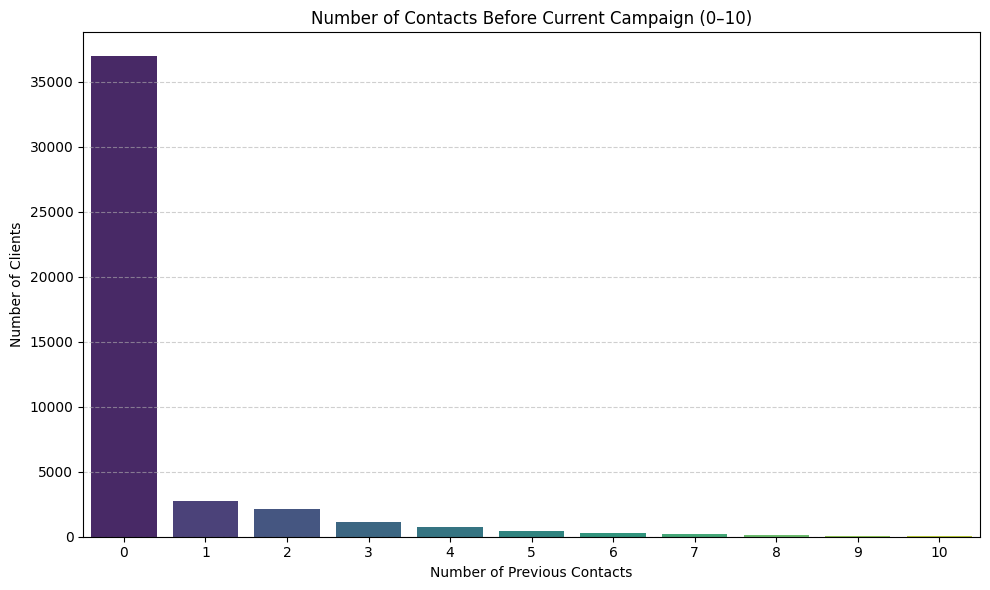

In [ ]:
# Focus on reasonable range: 0 to 10 contacts
filtered = df[df['previous'] <= 10]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, x='previous', palette='viridis')
plt.title('Number of Contacts Before Current Campaign (0–10)')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**17. What were the outcomes of the previous marketing campaigns?**

---



In [ ]:
df['had_previous_campaign'].value_counts()

,count
had_previous_campaign,
0,43694
1,1511


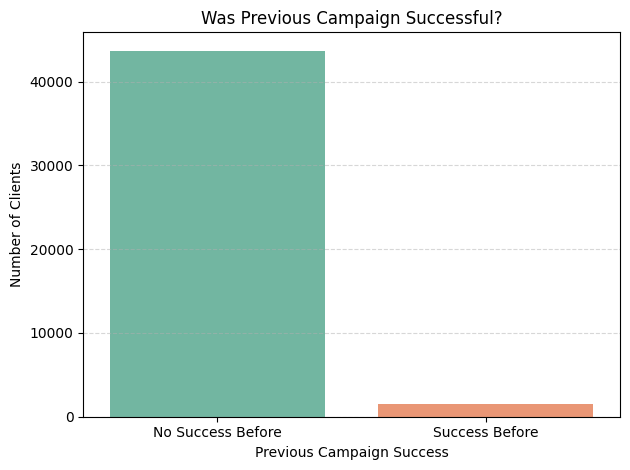

In [ ]:
sns.countplot(x='had_previous_campaign', data=df, palette='Set2')
plt.xticks([0, 1], ['No Success Before', 'Success Before'])
plt.title('Was Previous Campaign Successful?')
plt.xlabel('Previous Campaign Success')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**18. What is the distribution of clients who subscribed to a term deposit vs. those who did not?**

---



In [ ]:
print(df['y'].value_counts())

y
0    39917
1     5288
Name: count, dtype: int64


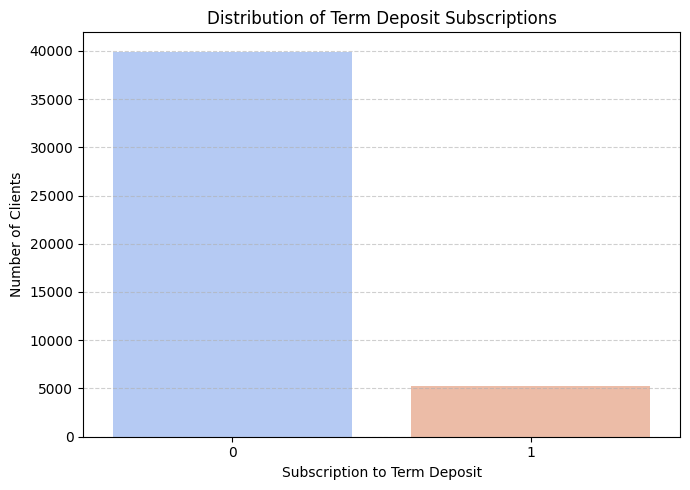

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='y', palette='coolwarm')
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**19. Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?**

---



Correlation with Numerical Variables:

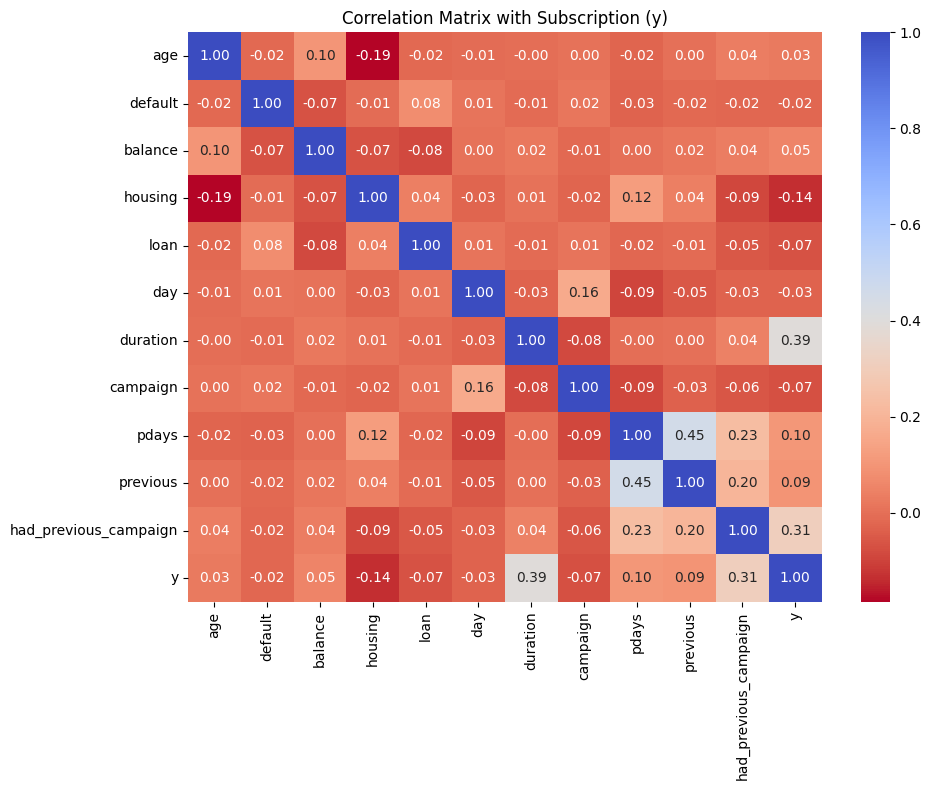

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Matrix with Subscription (y)')
plt.tight_layout()
plt.show()

Categorial Attributes vs. Subscription:

In [ ]:
subscription_by_job = df.groupby('job')['y'].mean().sort_values(ascending=False)
print(subscription_by_job)

job
student          0.287393
retired          0.228016
unemployed       0.155027
management       0.137479
admin.           0.122027
self-employed    0.118429
technician       0.110570
services         0.088830
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.074059
Name: y, dtype: float64


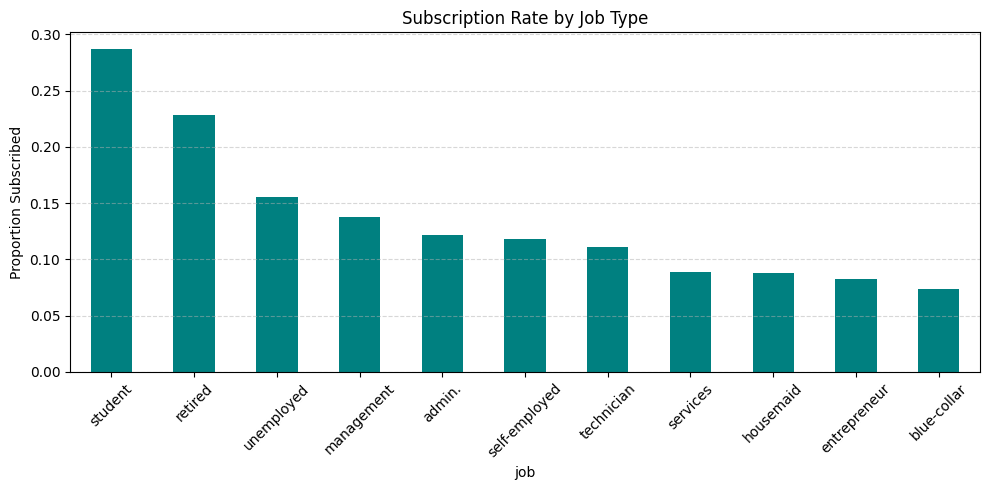

In [ ]:
subscription_by_job.plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('Subscription Rate by Job Type')
plt.ylabel('Proportion Subscribed')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()